# Image Combination and Processing Tutorial/Boilerplate

This notebook will help you create median combined flat field images from the WIYN 0.9m

In [68]:
import astropy.io.fits as fits
import numpy as np
import glob

In [75]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [62]:
##read in a sample 0.9m image and print it's dimensions
image1 = fits.getdata("data/wiyn0_9/2016june18/NGC6240/c7558t0054o00.fits")
image1.shape

(4150, 4150)

In [ ]:
##Tell the program how many flat images to combine
nims =     ##insert the number of flat images here before the ##
basestring =  ##insert the path to the file and basic string that starts out the name of all of the files, in quotations. 
              ## For example, "data/wiyn0_9/2016june18/NGC6240/c7558t"


In [ ]:
##this piece takes your input above and makes a 3D "cube" of bias-subtracted images for you to work with
dim = len(image1[0])
image = np.zeros((dim,dim,nims))
for index in range(nims):
    image[:,:,index] = fits.getdata(basestring+'%04i' % index +'o00.fits')
    ## subtract the bias from the bias overscan regions
    overscan=image[4100:4140,4100:4140,index]
    overscan_mean = mean(overscan)
    image_bsub[:,:,index] = image[:,:,index] - overscan_mean

In [ ]:
##now we'll take the median combination of these images
median_image = median(image_bsub, axis=3)

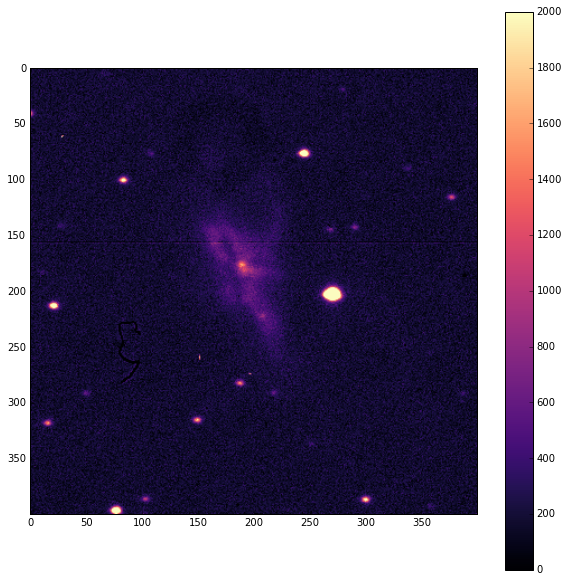

In [105]:
## plot this median image
figure(figsize=(10,10))
imshow(median_image, cmap='magma')
colorbar()

In [107]:
## write out your new image as a .fits file

fname =   ##fill in your desired filename here, in quotes, for example "Rflat.fits"
fits.writeto(fname, median_image)

Object `writeto` not found.
